# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

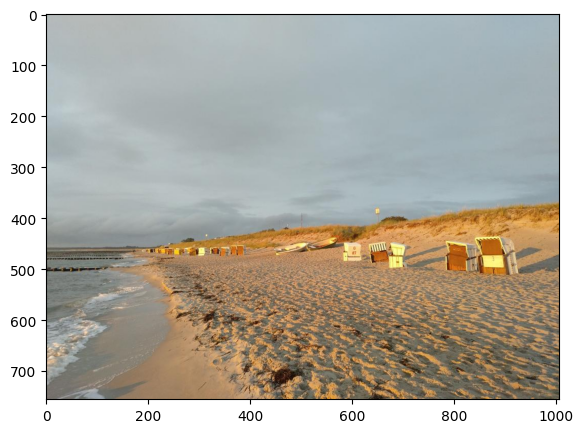

In [3]:
img = cv2.imread('data/sea.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

In [ ]:
# Define white patch and the coefficients
row, col = 485, 864 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

(<Axes: >, <matplotlib.image.AxesImage at 0x12d7d88d0>)

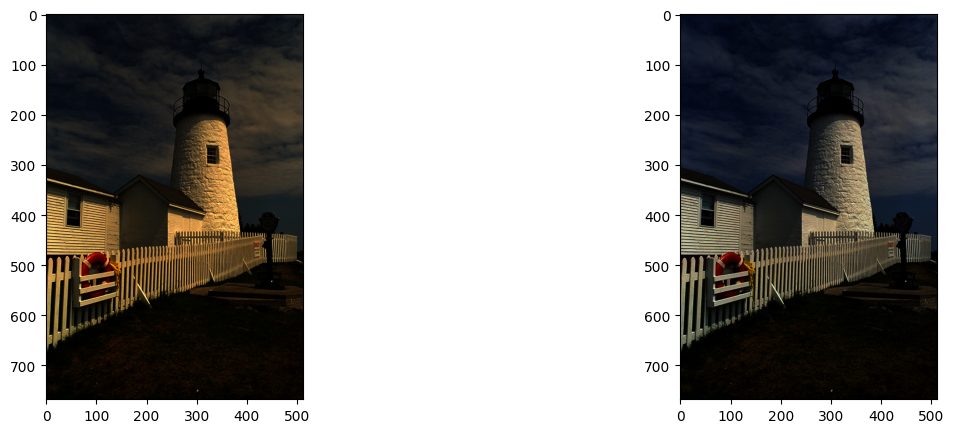

In [30]:
# Load your image
img = cv2.imread('data/dark.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def gray_world_balance(img):

    # Compute the mean values for all three colour channels (red, green, blue)
    mean_r = np.mean(img[:, :, 0])
    mean_g = np.mean(img[:, :, 1])
    mean_b = np.mean(img[:, :, 2])

    mean_gray = (mean_r + mean_g + mean_b) / 3

    kr = mean_gray / mean_r
    kg = mean_gray / mean_g
    kb = mean_gray / mean_b

    #we add coefficient, but instead of fixing it to 1, we clip range to 0-255 on image channels 

    img[:, :, 0] = np.clip(img[:, :, 0] * kr, 0, 255)
    img[:, :, 1] = np.clip(img[:, :, 1] * kg, 0, 255)
    img[:, :, 2] = np.clip(img[:, :, 2] * kb, 0, 255)

    return img

# Apply color balancing and generate the balanced image
balanced = gray_world_balance(img.copy())

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

1.3010204081632653 1.3010204081632653 1.3010204081632653


(<Axes: >, <matplotlib.image.AxesImage at 0x12d617490>)

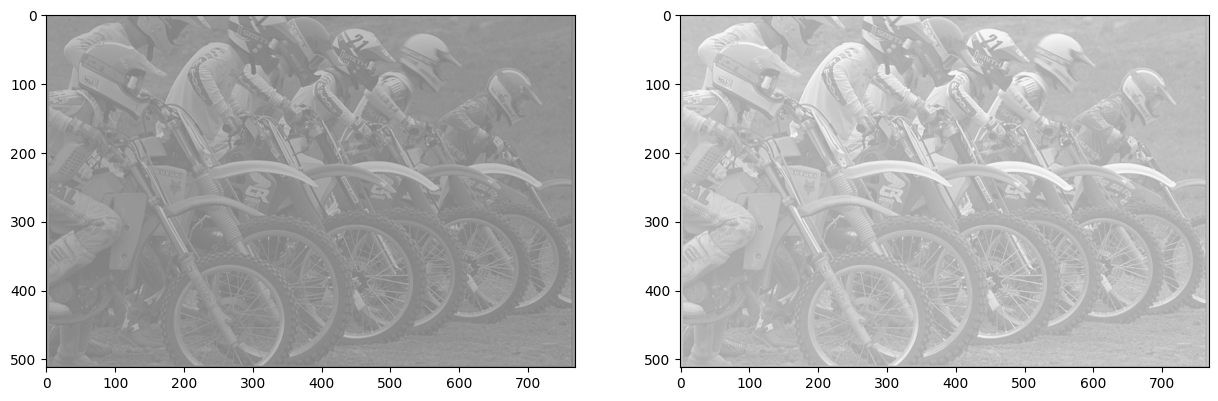

In [29]:
# Load your image
img = cv2.imread('data/kodim05.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def scale_max_balance(img):

    # Compute the max values for all three colour channels (red, green, blue)
    max_r = np.max(img[:, :, 0])
    max_g = np.max(img[:, :, 1])
    max_b = np.max(img[:, :, 2])

    scale_r = 255.0 / max_r
    scale_g = 255.0 / max_g
    scale_b = 255.0 / max_b

    #print(scale_r, scale_b, scale_g)

    #we add coefficient, but instead of fixing it to 1, we clip range to 0-255 on image channels 

    img[:, :, 0] = np.clip(img[:, :, 0] * scale_r, 0, 255)
    img[:, :, 1] = np.clip(img[:, :, 1] * scale_g, 0, 255)
    img[:, :, 2] = np.clip(img[:, :, 2] * scale_b, 0, 255)

    return img

# Apply scale-by-max balancing and generate the balanced image
balanced = scale_max_balance(img.copy())

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)